# iX Project -- Female-Headed Households in SA
Sydney McMahon -- Team 7

In [ ]:
# Interested in the percent of households per ward that are female-run AND have an annual income below R19,600 ($2,300)

In [213]:
# Load all the important packages 

import pandas as pd
import numpy as np
import seaborn as sns
import ast, json


from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [214]:
df = pd.read_csv('Train.csv')
df.head(20)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000
5,41601006: Ward 6,1956.16888,6340.05782,25.249880,0.766832,0.000579,0.005874,0.000000,0.000000,0.001448,...,0.020771,0.002275,0.024184,0.039423,0,0,ZA4161006,-29.126870,25.410360,1.464541
6,41602001: Ward 1,1966.40293,6230.77491,19.984585,0.908400,0.006857,0.002941,0.000576,0.000720,0.001905,...,0.003827,0.000509,0.002542,0.020192,0,0,ZA4162001,-29.640860,26.091774,0.821738
7,41602002: Ward 2,2214.44168,6873.93123,16.511081,0.890079,0.004549,0.002262,0.001151,0.000512,0.001805,...,0.006364,0.001279,0.000526,0.025246,0,0,ZA4162002,-30.029163,25.917164,0.000000
8,41602003: Ward 3,2022.95917,6736.49015,25.962117,0.912298,0.002799,0.003688,0.000560,0.001260,0.000560,...,0.006109,0.001276,0.000000,0.008791,0,0,ZA4162003,-30.462176,26.133170,0.000000
9,41602004: Ward 4,1775.53323,5682.10110,21.744166,0.882665,0.005227,0.009128,0.000000,0.003687,0.002839,...,0.002644,0.000000,0.000583,0.002073,0,0,ZA4162004,-30.420421,25.351630,0.000000


In [4]:
df.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [5]:
df.shape

(2822, 63)

In [7]:
df.apply('nunique')

ward                 2822
total_households     2822
total_individuals    2822
target               2822
dw_00                2822
                     ... 
pw_08                   1
ADM4_PCODE           2822
lat                  2822
lon                  2822
NL                   2658
Length: 63, dtype: int64

## EDA

In [215]:
# can load variable description data from the website
var_desc = pd.read_csv('variable_descriptions.csv')
pd.set_option('display.max_colwidth',100)
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or ...,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters...,NaN,NaN


In [9]:
print(df.isnull().sum()) # data is all here!

ward                 0
total_households     0
total_individuals    0
target               0
dw_00                0
                    ..
pw_08                0
ADM4_PCODE           0
lat                  0
lon                  0
NL                   0
Length: 63, dtype: int64


In [10]:
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [216]:
# going to try to drop some columns
# going with columns that have all zeros (are either N/A or Unspecified)
df = df.drop(['dw_12', 'dw_13', 'lan_13', 'pw_07', 'pw_08'], axis=1)
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.214027,0.019968,0.002848,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.576844,0.018946,0.014566,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.483376,0.083010,0.057560,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.314194,0.002689,0.000000,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.194743,0.009699,0.004859,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000


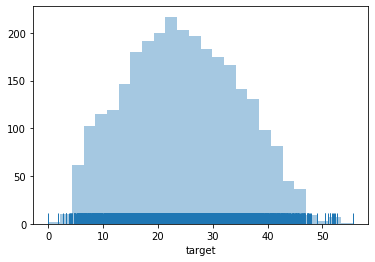

In [12]:
sns.distplot(df.target, kde=False, rug=True)

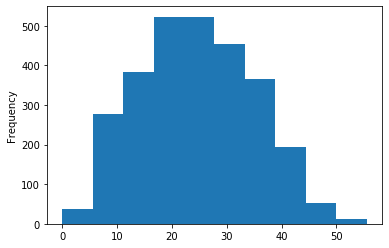

In [13]:
# plot distribution of female-headed households with an annual income < R19,600
plot = df.target.plot(kind ='hist')

In [110]:
dwelling = ['dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08','dw_09', 'dw_10', 'dw_11']
school = ['psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04']
language = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11','lan_12', 'lan_14']
population = ['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04']
water = ['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05','pw_06']
extra = ['stv_00', 'stv_01', 'car_00', 'car_01','lln_00', 'lln_01']

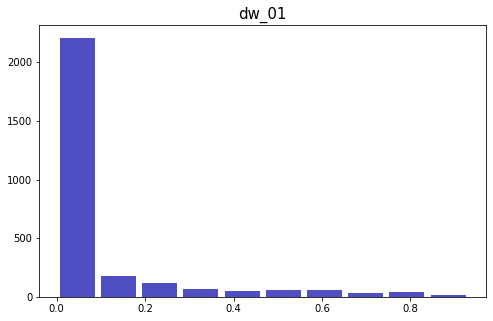

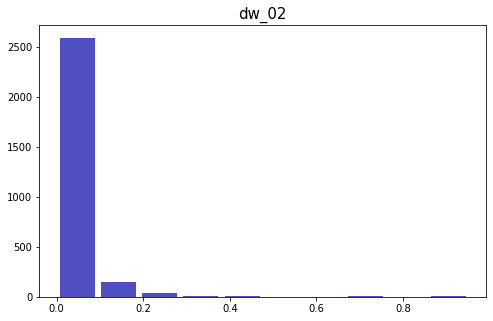

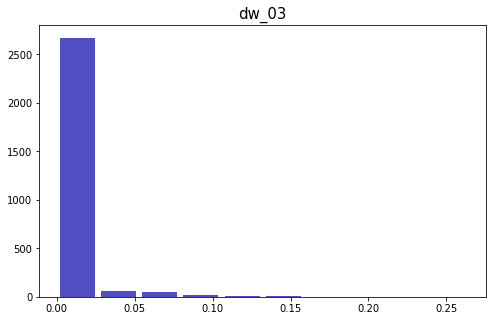

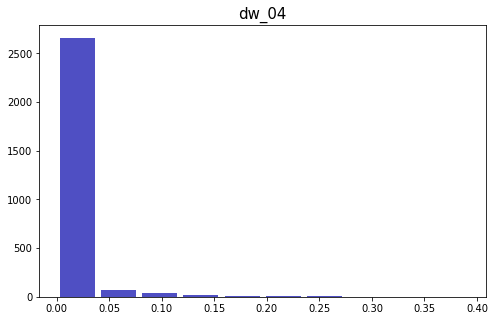

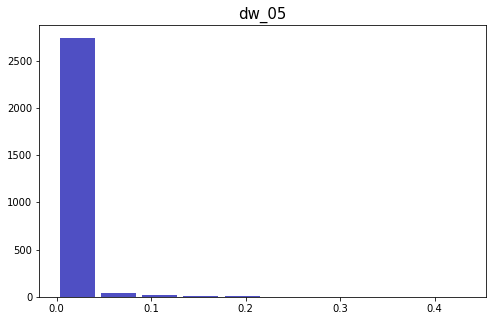

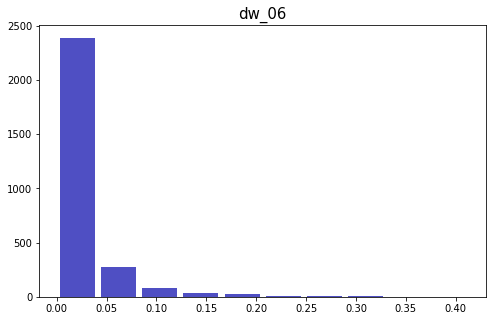

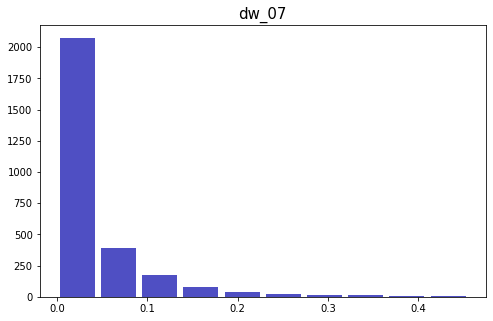

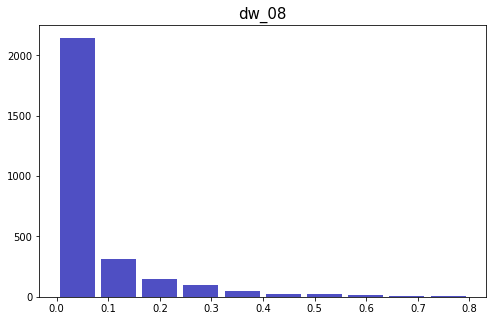

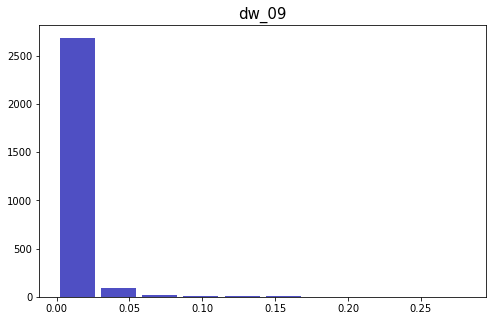

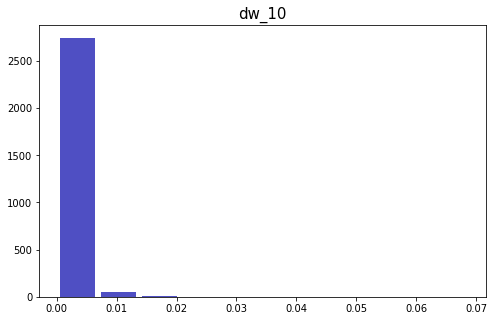

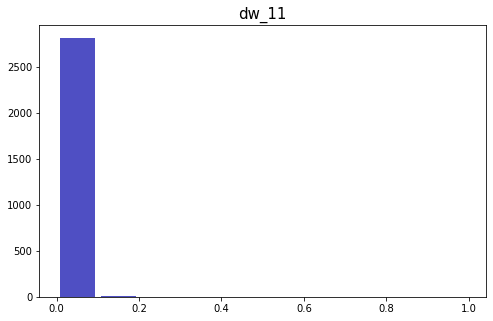

In [111]:
for i in dwelling :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

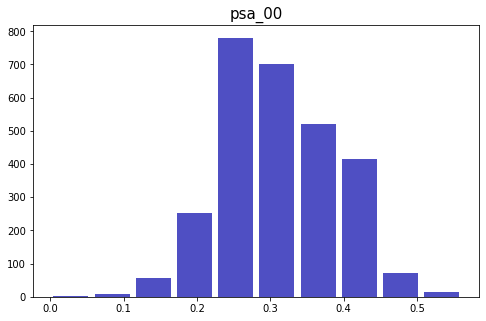

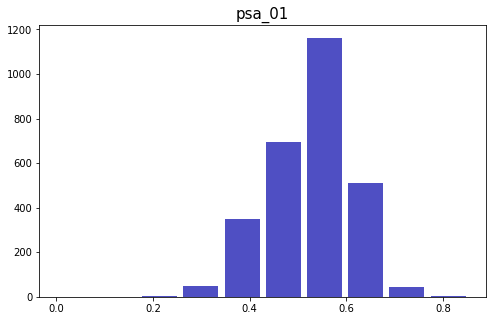

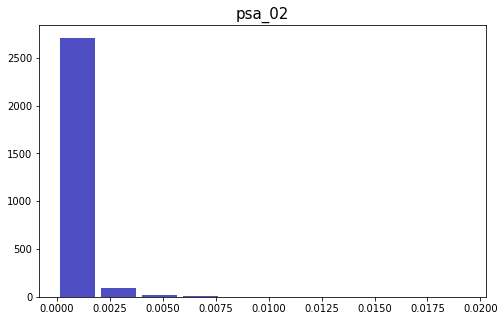

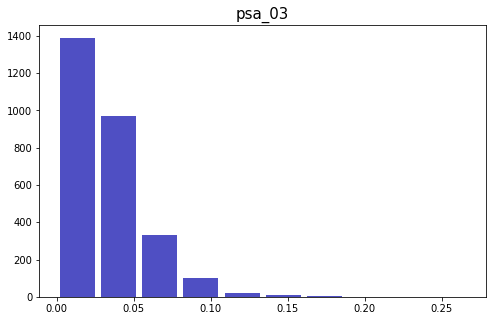

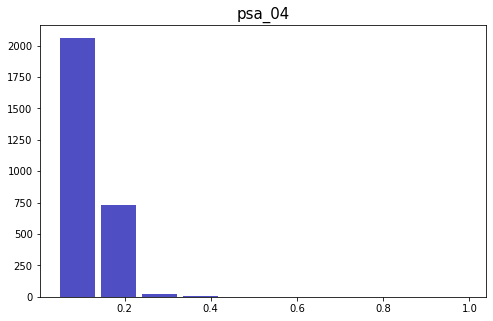

In [112]:
for i in school :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

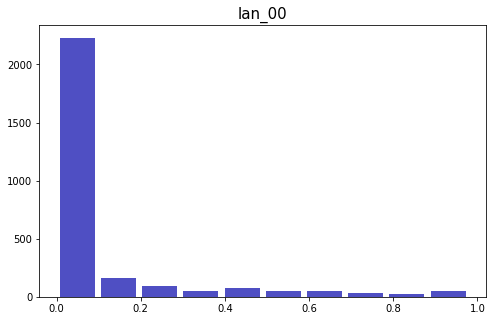

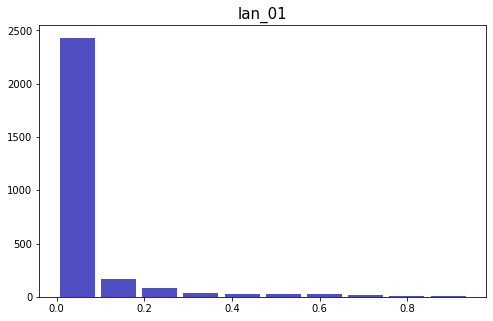

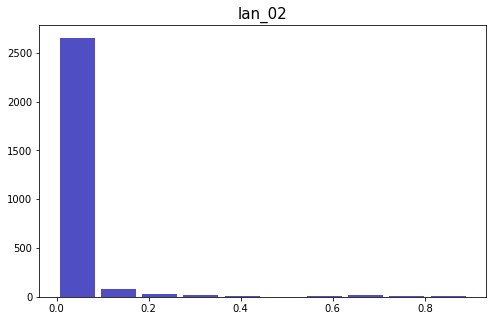

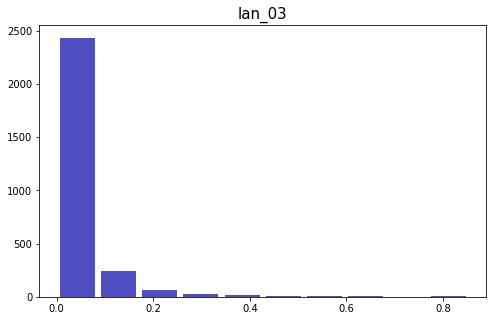

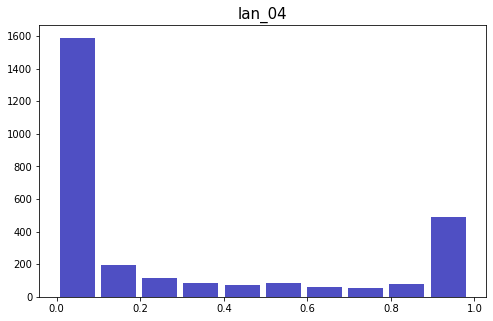

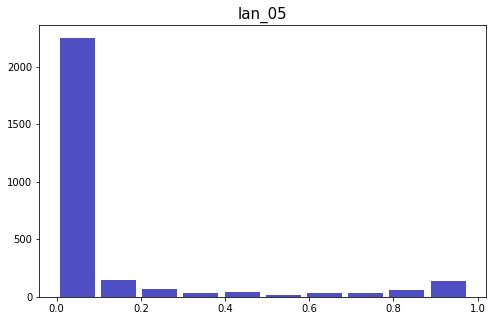

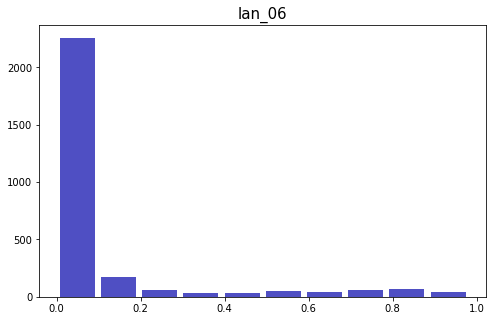

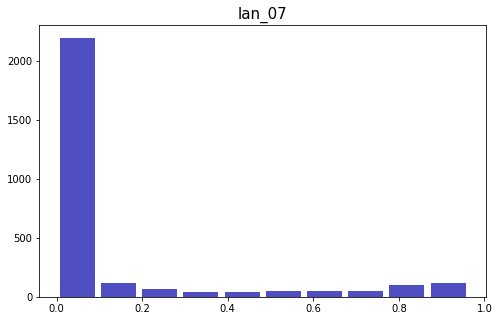

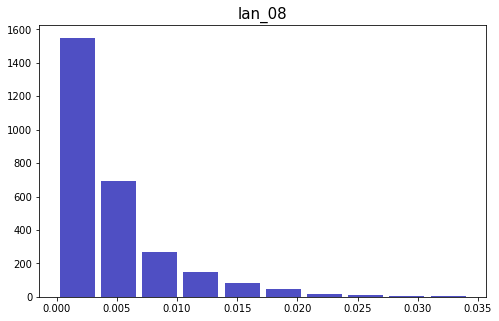

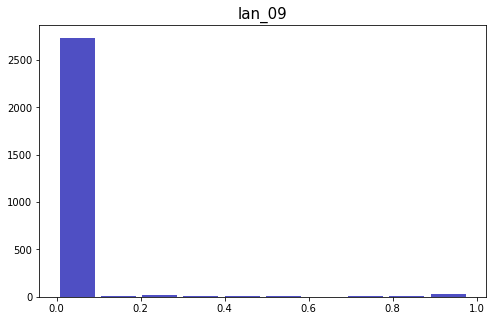

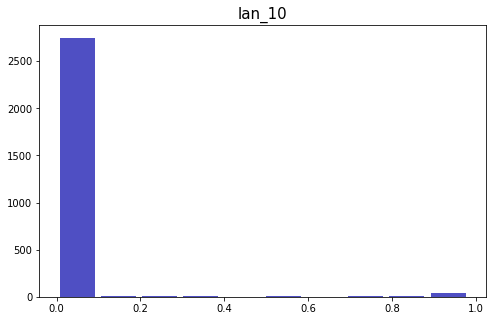

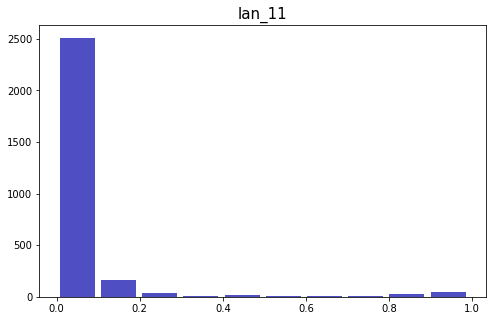

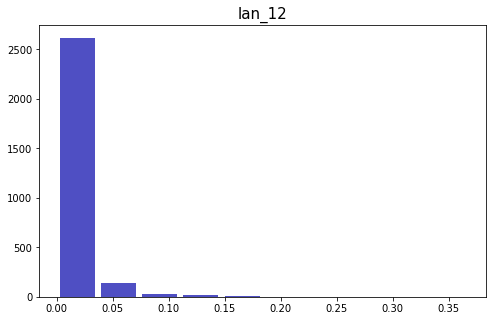

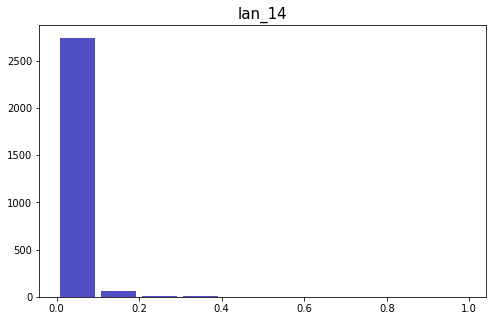

In [113]:
for i in language :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

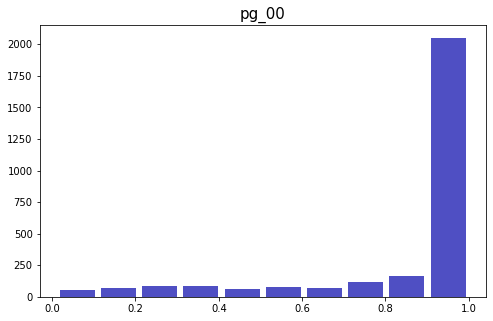

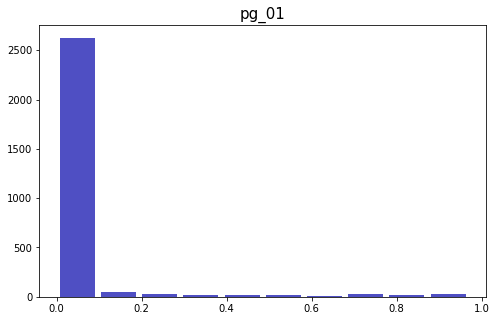

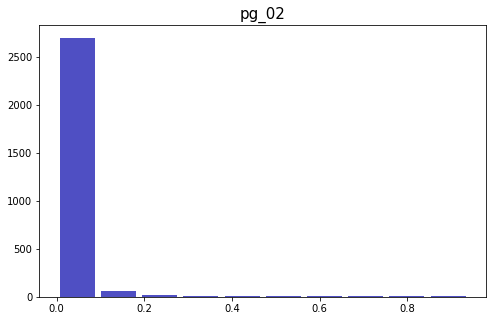

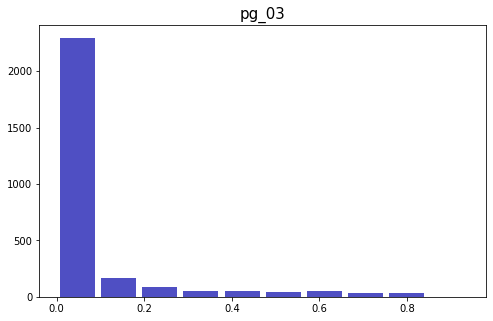

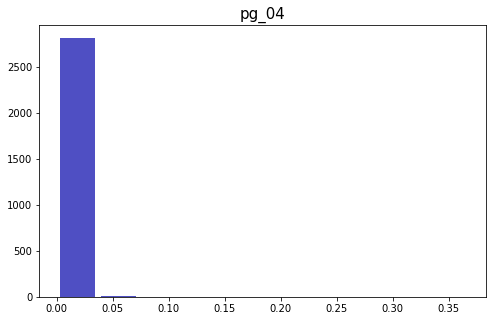

In [114]:
for i in population :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

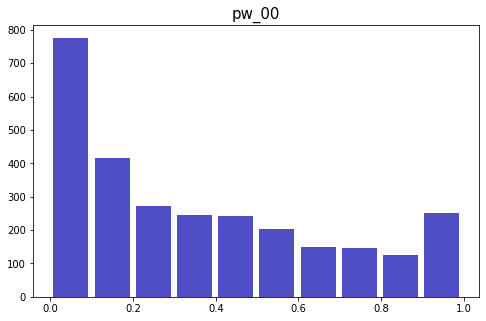

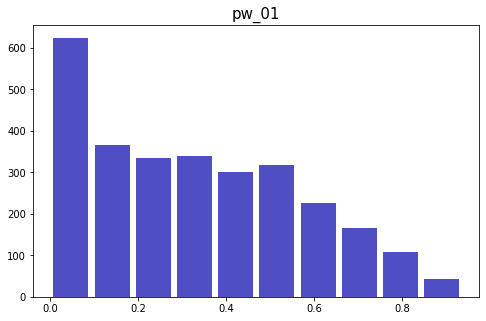

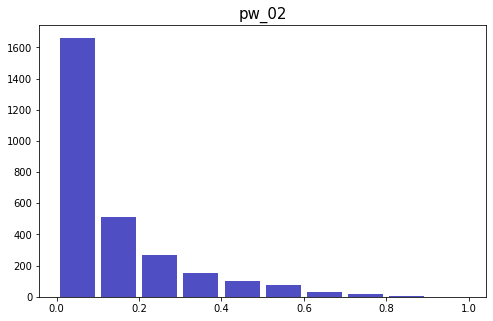

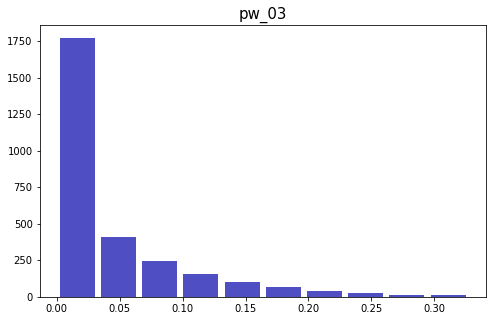

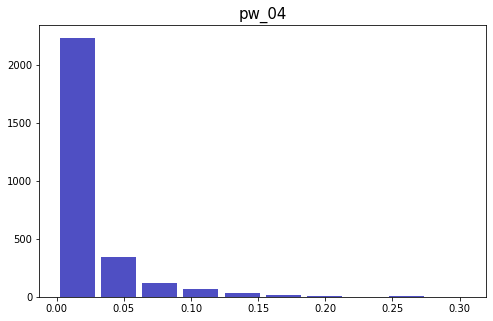

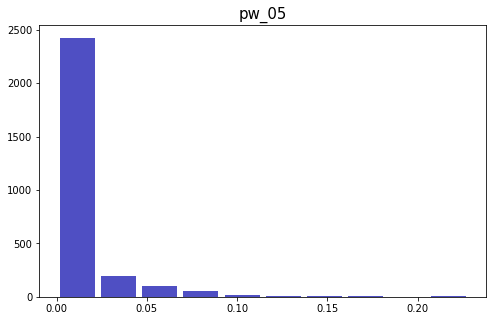

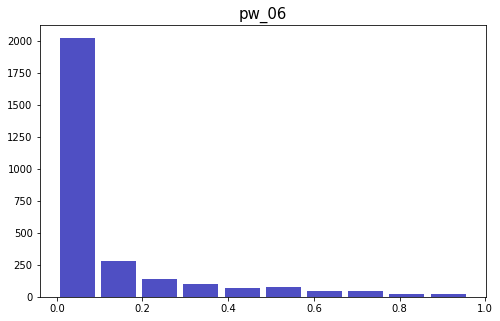

In [115]:
for i in water :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

In [217]:
# adding household size 
df['household_size'] = df['total_individuals'] / df['total_households']
df.head()
df.household_size.mean()

5.16324901016857

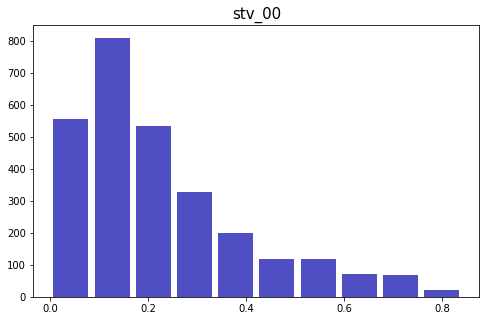

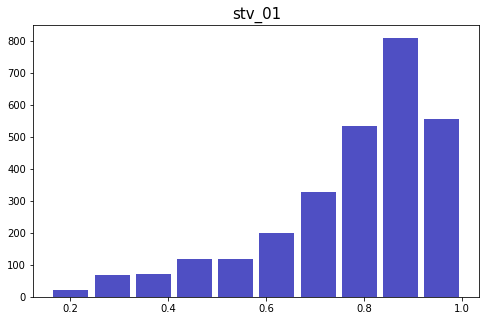

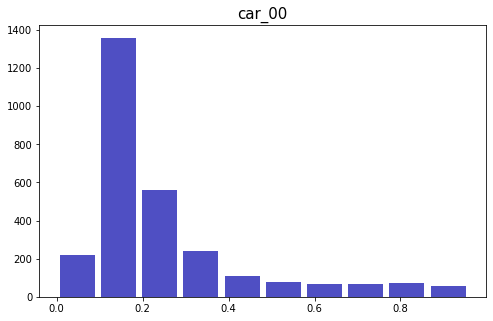

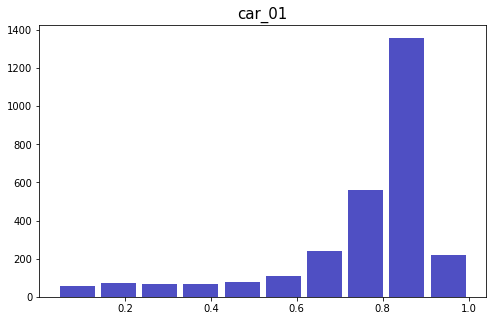

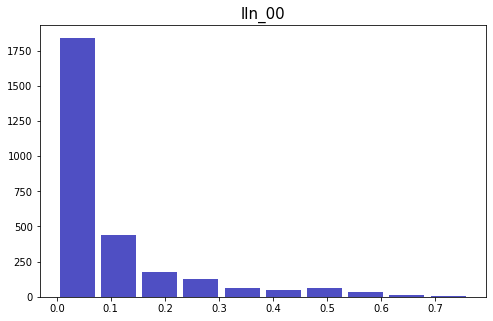

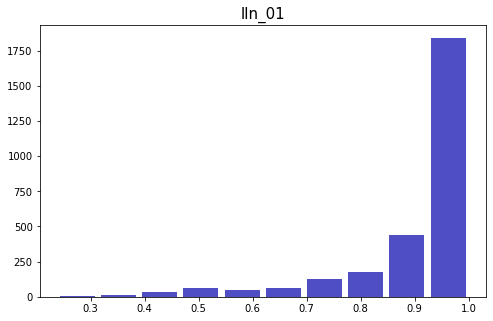

In [117]:
for i in extra :
    plt.figure(figsize=[8,5])
    plt.hist(df[i], color='#0504aa',alpha=0.7, rwidth=0.85)
    plt.title(i,fontsize=15)

In [218]:
# look at some correlations between variables
df.corr()['target'].sort_values(ascending=False).head(60)

target               1.000000
psa_00               0.782472
car_01               0.702831
stv_01               0.664181
lln_01               0.637835
pg_00                0.613346
pw_06                0.470676
dw_01                0.458206
pw_02                0.442441
pw_03                0.440941
pw_04                0.389467
pw_05                0.349653
lon                  0.347088
lan_05               0.275263
lan_04               0.232266
lan_11               0.210597
psa_04               0.203999
lat                  0.120381
pw_01                0.113646
lan_10               0.106548
lan_09               0.066230
dw_00                0.018461
lan_08              -0.003930
lan_02              -0.020163
lan_06              -0.038563
household_size      -0.039266
lan_07              -0.046968
psa_02              -0.097613
dw_11               -0.109490
dw_10               -0.128540
lan_03              -0.142685
dw_05               -0.146357
dw_07               -0.177763
dw_08     

In [219]:
df.corr()['target'].sort_values().head(20)

pw_00               -0.754536
psa_01              -0.707506
car_00              -0.702831
stv_00              -0.664181
lln_00              -0.637835
pg_03               -0.583908
NL                  -0.514398
lan_00              -0.507942
lan_01              -0.438704
dw_04               -0.385533
total_households    -0.374833
dw_03               -0.338137
lan_12              -0.325367
psa_03              -0.301572
total_individuals   -0.293827
lan_14              -0.287004
lgt_00              -0.260286
dw_06               -0.248573
dw_09               -0.235331
pg_01               -0.232792
Name: target, dtype: float64

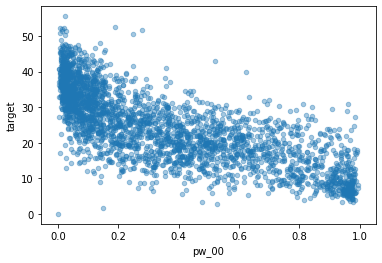

In [220]:
df.plot(x = "pw_00", y = "target", kind = 'scatter', alpha = 0.4) # shows a strong negative correlation aka running water means less of a chance that household is femail-run and >19,600

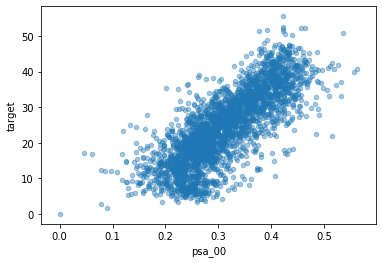

In [121]:
df.plot(x = 'psa_00', y = 'target', kind =  'scatter', alpha = 0.4)

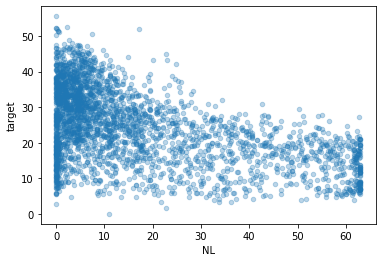

In [122]:
df.plot(x = 'NL', y = 'target', kind = 'scatter', alpha = 0.3)

In [221]:
# add column of "best" and "worst" cases
df['Best_Case'] = df.psa_01 + df.car_00 + df.stv_00 + df.pw_00
df['Worst_Case'] = df.psa_00 + df.car_01 + df.stv_01 + df.pw_06
df.head(20)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_04,pw_05,pw_06,ADM4_PCODE,lat,lon,NL,household_size,Best_Case,Worst_Case
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.007537,0.000000,0.012928,ZA4161001,-29.682270,24.734743,0.292039,3.516501,1.907786,1.715924
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.057127,0.019092,0.004131,ZA4161002,-29.119311,24.757737,3.207775,3.877587,1.107362,2.046080
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.010358,0.001421,0.040881,ZA4161003,-29.142276,25.094093,0.000000,3.025929,1.438390,1.789324
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000669,0.000000,0.005011,ZA4161004,-29.372052,24.942867,2.038778,3.294194,1.486361,2.070596
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.001290,0.000673,0.017629,ZA4161005,-29.409381,25.290165,0.000000,3.846971,2.039167,1.463834
5,41601006: Ward 6,1956.16888,6340.05782,25.249880,0.766832,0.000579,0.005874,0.000000,0.000000,0.001448,...,0.002275,0.024184,0.039423,ZA4161006,-29.126870,25.410360,1.464541,3.241059,1.195272,1.952412
6,41602001: Ward 1,1966.40293,6230.77491,19.984585,0.908400,0.006857,0.002941,0.000576,0.000720,0.001905,...,0.000509,0.002542,0.020192,ZA4162001,-29.640860,26.091774,0.821738,3.168616,1.465581,1.879596
7,41602002: Ward 2,2214.44168,6873.93123,16.511081,0.890079,0.004549,0.002262,0.001151,0.000512,0.001805,...,0.001279,0.000526,0.025246,ZA4162002,-30.029163,25.917164,0.000000,3.104137,1.554278,1.764054
8,41602003: Ward 3,2022.95917,6736.49015,25.962117,0.912298,0.002799,0.003688,0.000560,0.001260,0.000560,...,0.001276,0.000000,0.008791,ZA4162003,-30.462176,26.133170,0.000000,3.330018,1.436572,1.864808
9,41602004: Ward 4,1775.53323,5682.10110,21.744166,0.882665,0.005227,0.009128,0.000000,0.003687,0.002839,...,0.000000,0.000583,0.002073,ZA4162004,-30.420421,25.351630,0.000000,3.200222,1.777394,1.626810


## Modeling (starting with basic Linear Regression)

Starting off with linear regression

In [222]:
X = df[['psa_00','stv_01', 'car_01', 'lln_01', 'pw_00', 'pw_06', 'dw_01', 'NL' ]]
y = df['target']

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

In [224]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (2257, 8)
y_train (2257,)
X_test (565, 8)
y_test (565,)


In [225]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [226]:
lm.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
predictions = lm.predict(X_test)

In [228]:
predictions

array([26.97819423, 19.36870292, 25.07750469, 27.41869845, 34.75896093,
       15.74958401, 10.07134552, 18.88080319, 24.61049802, 39.5001091 ,
       30.9136733 , 18.86566179, 31.08286892,  4.98787572, 29.92281859,
       25.16776971, 18.81530621, 33.4877122 , 25.37456531, 35.77275334,
       30.16688533, 16.77504157, 20.08057758, 20.09980718, 32.32740866,
       21.86808402, 33.98000847, 37.30444684, 24.48905765, 22.05302916,
       15.42996378, 39.12343563, 27.21395792, 26.21839641, 37.39996026,
       33.49225116, 23.49822297, 29.80157701, 26.70655451, 15.91640762,
       35.19704395, 32.79461646, 26.78829364, 18.16973217, 16.07547389,
       20.05059169, 23.40194886, 30.77913462, 36.02827484, 36.13893103,
       34.1904391 ,  8.70900916, 30.22180463, 44.9065001 , 28.81550359,
       33.80908837, 36.00107016, 36.13819474, 39.19800255, 14.77480585,
       29.91441343, 22.4348786 , 30.26559919,  9.32267597, 15.32736036,
       28.70075257, 24.45507379, 19.46123667, 30.44485084, 36.35

In [229]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,psa_00,stv_01,car_01,lln_01,pw_00,pw_06,dw_01,NL,target,prediction
0,1091,0.293419,0.849714,0.847041,0.929402,0.234088,0.062959,0.312948,0.000000,15.867901,26.978194
1,2510,0.205524,0.920647,0.828081,0.955004,0.175511,0.146579,0.046439,15.773764,14.744632,19.368703
2,1474,0.324971,0.664428,0.765977,0.811388,0.586941,0.079092,0.091124,35.747076,25.767571,25.077505
3,1437,0.347064,0.742759,0.858030,0.902126,0.460577,0.012393,0.008494,54.992047,27.705788,27.418698
4,1105,0.375997,0.936816,0.891677,0.970510,0.032147,0.406589,0.801225,3.922369,42.524363,34.758961


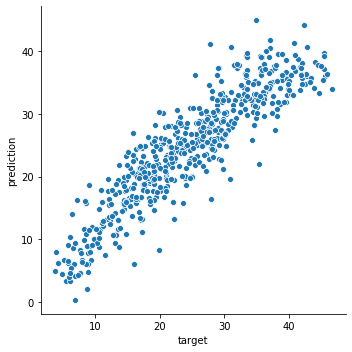

In [131]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")

In [230]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, predictions)
print(f'mae = {mae}')
mse = metrics.mean_squared_error(y_test, predictions)
print(f'mse = {mse}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f'rmse = {rmse}')
r2 = metrics.r2_score(y_test, predictions)
print(f'r2 = {r2}')

mae = 3.3435569621156893
mse = 18.039594696022057
rmse = 4.247304403503716
r2 = 0.8171447402304811


## Let's try the OG methods and then the ensemble methods


In [231]:
X_data = df[['psa_00','stv_01', 'car_01', 'lln_01', 'pw_00', 'pw_06', 'dw_01', 'NL' ]]
y_data = df['target']

In [232]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [233]:
# from W2D5 ensemble notebook

from sklearn.model_selection import cross_validate

In [235]:
RESULTS = {}

In [236]:
# creates a function to run the model and add the (avereaged -MAE scores) to the RESULTS dictionary
def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=X_data,
                    y=y_data,
                    scoring="neg_mean_absolute_error",
                          n_jobs=-1, cv=3,
                     return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()



In [237]:
# creates function to display results
def display_results(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

In [238]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge


RESULTS["DecisionTree"] = evaluate_model(DecisionTreeRegressor())
RESULTS["LinearRegression"] = evaluate_model(LinearRegression())
RESULTS["ElasticNet"] = evaluate_model(ElasticNet()) 
RESULTS["Lasso"] = evaluate_model(Lasso()) 
RESULTS["Ridge"] = evaluate_model(Ridge())

pd.DataFrame.from_dict(RESULTS).T


,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00


In [239]:
# from the table above, we see that the decision tree has the lowest train_score, however it may be too close to 0

## Let's try stacking, bagging and boosting 

In [240]:
# stacking

from mlxtend.regressor import StackingRegressor

estimator_stacking = StackingRegressor(
    regressors=[
        DecisionTreeRegressor(),
        LinearRegression(),
        ElasticNet()
    ], 
    meta_regressor=LinearRegression())


RESULTS["Stacking"]  = evaluate_model(estimator_stacking)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07


In [241]:
# bagging

from sklearn.ensemble import BaggingRegressor, BaggingClassifier

estimator_bagging_10 = BaggingRegressor(n_estimators=10)

RESULTS["BaggingTree10"] = evaluate_model(estimator_bagging_10)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00


In [242]:
# bagging is pretty good! (i think)

In [243]:
estimator_bagging_100 = BaggingRegressor(n_estimators=100)

RESULTS["BaggingTree100"] = evaluate_model(estimator_bagging_100)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00
BaggingTree100,1.724156,0.041006,3.377858,1.090828e+00


In [244]:
# random forests
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

estimator_randomforest = RandomForestRegressor(n_estimators=100)

RESULTS["RandomForest100"] = evaluate_model(estimator_randomforest)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00
BaggingTree100,1.724156,0.041006,3.377858,1.090828e+00
RandomForest100,1.271516,0.028208,3.385901,1.091163e+00


In [245]:
# boosting

from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

estimator_adaboost = AdaBoostRegressor(n_estimators=100)

RESULTS["AdaBoost100"]  = evaluate_model(estimator_adaboost)
display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00
BaggingTree100,1.724156,0.041006,3.377858,1.090828e+00
RandomForest100,1.271516,0.028208,3.385901,1.091163e+00
AdaBoost100,0.459380,0.020857,3.742939,3.345773e+00


In [246]:
from xgboost import XGBRegressor, XGBClassifier

estimator_xgboost = XGBRegressor(n_estimators=500)

RESULTS["XGBoost500"] = evaluate_model(estimator_xgboost)

display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00
BaggingTree100,1.724156,0.041006,3.377858,1.090828e+00
RandomForest100,1.271516,0.028208,3.385901,1.091163e+00
AdaBoost100,0.459380,0.020857,3.742939,3.345773e+00


In [159]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm

In [247]:
from lightgbm import LGBMRegressor

clf_lgbm = LGBMRegressor(n_estimators=500)

RESULTS["LGBM500"] = evaluate_model(clf_lgbm)

display_results(RESULTS)

,fit_time,score_time,test_score,train_score
DecisionTree,0.021019,0.002005,4.600310,2.685556e-07
LinearRegression,0.007998,0.001511,3.601778,3.366090e+00
ElasticNet,0.003748,0.001344,7.491203,6.642378e+00
Lasso,0.005573,0.001677,6.919711,6.117299e+00
Ridge,0.010487,0.002993,3.646641,3.404123e+00
Stacking,0.029149,0.002859,4.557666,2.900398e-07
BaggingTree10,0.148841,0.006176,3.522413,1.226818e+00
BaggingTree100,1.724156,0.041006,3.377858,1.090828e+00
RandomForest100,1.271516,0.028208,3.385901,1.091163e+00
AdaBoost100,0.459380,0.020857,3.742939,3.345773e+00


In [ ]:
# bagging method with 100 estimators seems to have the best score (based on this table)

## Calculate the predictions

In [ ]:
models = [DecisionTreeRegressor(),LinearRegression(), ElasticNet(), Lasso(), Ridge(),
          StackingRegressor(regressors=[DecisionTreeRegressor(),LinearRegression(),ElasticNet()], meta_regressor=LinearRegression()),
         BaggingRegressor(n_estimators=10),
         BaggingRegressor(n_estimators=100),
         RandomForestRegressor(n_estimators=100),
         AdaBoostRegressor(n_estimators=100),
         XGBRegressor(n_estimators=500),
         LGBMRegressor(n_estimators=500)]

model_names = ['DecisionTree','LinearRegression', 'ElasticNet', 'Lasso', 'Ridge',
            'Stacking', 'BaggingTree10', 'BaggingTree100', 'RandomForest100',
            'AdaBoost100', 'XGBoost500', 'LGBM500']

In [296]:
# doing this because I'm having a lot of trouble with the for loop

predict_decisiontree = DecisionTreeRegressor().fit(X_data, y_data).predict(X_data)
PREDICTIONS['DecisionTree'] = predict_decisiontree

predict_linearReg = LinearRegression().fit(X_data, y_data).predict(X_data)
PREDICTIONS['LinearRegression'] = predict_linearReg

predict_elastic = ElasticNet().fit(X_data, y_data).predict(X_data)
PREDICTIONS['ElasticNet'] = predict_elastic

predict_lasso = Lasso().fit(X_data, y_data).predict(X_data)
PREDICTIONS['Lasso'] = predict_lasso

predict_ridge = Ridge().fit(X_data, y_data).predict(X_data)
PREDICTIONS['Ridge'] = predict_ridge

predict_stacking = StackingRegressor(regressors=[DecisionTreeRegressor(),LinearRegression(),ElasticNet()], meta_regressor=LinearRegression()).fit(X_data, y_data).predict(X_data)
PREDICTIONS['Stacking'] = predict_stacking

predict_bagging10 = BaggingRegressor(n_estimators=10).fit(X_data, y_data).predict(X_data)
PREDICTIONS['BaggingTree10'] = predict_bagging10

predict_bagging100 = BaggingRegressor(n_estimators=100).fit(X_data, y_data).predict(X_data)
PREDICTIONS['BaggingTree100'] = predict_bagging100

predict_forest = RandomForestRegressor(n_estimators=100).fit(X_data, y_data).predict(X_data)
PREDICTIONS['RandomForest100'] = predict_forest

predict_ada = AdaBoostRegressor(n_estimators=100).fit(X_data, y_data).predict(X_data)
PREDICTIONS['AdaBoost100'] = predict_ada

predict_xgb = XGBRegressor(n_estimators=500).fit(X_data, y_data).predict(X_data)
PREDICTIONS['XGBoost500'] = predict_xgb

predict_lgbm = LGBMRegressor(n_estimators=500).fit(X_data, y_data).predict(X_data)
PREDICTIONS['LGBM500'] = predict_lgbm


#for model in models:
 #   fit = model.fit(X_data, y_data)
 #   predictions = model.predict(X_data)
 #   PREDICTIONS[model] = predictions
        
        
        
#for model in models:
#    for model_name in model_names:
#        fit = model.fit(X_data, y_data)
#        predictions = model.predict(X_data)
#        PREDICTIONS[model_name] = predictions
    

    

[12:38:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [312]:
PREDICTIONS

{'DecisionTree': array([16.77375692, 21.49666121, 10.93142467, ..., 13.23879526,
        17.63952345, 12.45768035]),
 'LinearRegression': array([18.44447969, 26.10123273, 15.99304753, ..., 15.10831301,
        20.21509532, 15.60471648]),
 'ElasticNet': array([28.24140769, 28.37908477, 29.06050442, ..., 27.67749776,
        27.86882243, 29.18081767]),
 'Lasso': array([25.25704833, 27.87109309, 28.43978999, ..., 25.64981983,
        26.0332495 , 28.49416534]),
 'Ridge': array([18.47072651, 26.00028407, 16.80019606, ..., 15.65554787,
        20.31080284, 16.60682356]),
 'Stacking': array([16.77375694, 21.49666127, 10.93142473, ..., 13.23879528,
        17.63952348, 12.45768039]),
 'BaggingTree10': array([17.0789552 , 22.61975702, 11.95371238, ..., 14.04514464,
        17.77111987,  9.21096614]),
 'BaggingTree100': array([17.82732593, 23.01452487, 12.22439968, ..., 13.88814106,
        18.12308488, 11.21206611]),
 'RandomForest100': array([17.64946442, 23.05026875, 12.13679468, ..., 13.510

In [297]:
display_results(PREDICTIONS)

,0,1,2,3,4,5,6,7,8,9,...,2812,2813,2814,2815,2816,2817,2818,2819,2820,2821
DecisionTree,16.773757,21.496661,10.931425,23.119257,13.652252,25.249880,19.984585,16.511081,25.962117,21.744166,...,30.593096,26.177120,21.439577,29.065233,15.288742,6.393480,15.668000,13.238795,17.639523,12.457680
LinearRegression,18.444480,26.101233,15.993048,22.451857,10.557666,23.407829,20.916316,20.729858,25.389781,19.648529,...,30.169184,26.117548,27.897238,28.825846,13.417399,3.950267,18.127610,15.108313,20.215095,15.604716
ElasticNet,28.241408,28.379085,29.060504,28.089498,28.143533,28.819551,28.644106,28.862082,28.874821,28.574045,...,28.411214,28.523079,29.541779,28.466999,25.843516,25.088435,28.426799,27.677498,27.868822,29.180818
Lasso,25.257048,27.871093,28.439790,25.376002,25.106853,28.516013,27.187257,27.579294,27.534007,26.629930,...,29.496907,29.558149,30.387781,29.520862,22.964805,22.095864,27.315627,25.649820,26.033249,28.494165
Ridge,18.470727,26.000284,16.800196,22.331691,11.273540,23.587641,21.056631,20.967532,25.093443,19.717944,...,30.213183,26.453840,28.069899,28.969436,13.861863,4.988378,18.648322,15.655548,20.310803,16.606824
Stacking,16.773757,21.496661,10.931425,23.119257,13.652252,25.249880,19.984585,16.511081,25.962117,21.744166,...,30.593096,26.177120,21.439577,29.065233,15.288742,6.393480,15.668000,13.238795,17.639523,12.457680
BaggingTree10,17.078955,22.619757,11.953712,23.795167,13.006647,24.364870,19.620582,16.918377,24.638111,19.439989,...,29.885952,26.936652,22.150443,29.245552,14.224341,5.712068,16.789364,14.045145,17.771120,9.210966
BaggingTree100,17.827326,23.014525,12.224400,23.761227,12.631301,23.347262,19.437944,16.888440,24.439830,19.728910,...,30.936346,26.600506,22.671987,29.239360,14.183974,6.559685,15.448373,13.888141,18.123085,11.212066
RandomForest100,17.649464,23.050269,12.136795,23.602494,12.588210,23.655437,19.029899,17.239149,24.543504,20.275318,...,30.536173,26.493739,22.920112,28.855723,14.124560,6.494274,15.604177,13.510788,18.439741,11.900455
AdaBoost100,17.485811,25.957138,16.586578,24.977882,14.618584,20.081945,18.097131,18.694211,22.422601,16.039843,...,29.576854,26.814510,26.695368,27.585175,14.209043,12.234575,16.586578,14.618584,17.936471,16.305591


In [298]:
predictions_df = pd.DataFrame.from_dict(PREDICTIONS)

In [301]:
predictions_df['target'] = y_data
predictions_df

,DecisionTree,LinearRegression,ElasticNet,Lasso,Ridge,Stacking,BaggingTree10,BaggingTree100,RandomForest100,AdaBoost100,XGBoost500,LGBM500,target
0,16.773757,18.444480,28.241408,25.257048,18.470727,16.773757,17.078955,17.827326,17.649464,17.485811,18.358953,17.241500,16.773757
1,21.496661,26.101233,28.379085,27.871093,26.000284,21.496661,22.619757,23.014525,23.050269,25.957138,25.233433,22.812508,21.496661
2,10.931425,15.993048,29.060504,28.439790,16.800196,10.931425,11.953712,12.224400,12.136795,16.586578,11.951869,11.326362,10.931425
3,23.119257,22.451857,28.089498,25.376002,22.331691,23.119257,23.795167,23.761227,23.602494,24.977882,22.438894,22.599594,23.119257
4,13.652252,10.557666,28.143533,25.106853,11.273540,13.652252,13.006647,12.631301,12.588210,14.618584,12.550118,13.030110,13.652252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,6.393480,3.950267,25.088435,22.095864,4.988378,6.393480,5.712068,6.559685,6.494274,12.234575,6.186011,6.224583,6.393480
2818,15.668000,18.127610,28.426799,27.315627,18.648322,15.668000,16.789364,15.448373,15.604177,16.586578,14.776974,15.412256,15.668000
2819,13.238795,15.108313,27.677498,25.649820,15.655548,13.238795,14.045145,13.888141,13.510788,14.618584,16.178452,14.086795,13.238795
2820,17.639523,20.215095,27.868822,26.033249,20.310803,17.639523,17.771120,18.123085,18.439741,17.936471,20.139004,18.661517,17.639523


In [302]:
predictions = predictions_df.to_csv('modeling_predictions.csv')

In [315]:
comparing2 = predictions_df[['BaggingTree100', 'LGBM500', 'target']]
comparing2

,BaggingTree100,LGBM500,target
0,17.827326,17.241500,16.773757
1,23.014525,22.812508,21.496661
2,12.224400,11.326362,10.931425
3,23.761227,22.599594,23.119257
4,12.631301,13.030110,13.652252
...,...,...,...
2817,6.559685,6.224583,6.393480
2818,15.448373,15.412256,15.668000
2819,13.888141,14.086795,13.238795
2820,18.123085,18.661517,17.639523


## Visualization

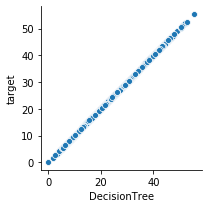

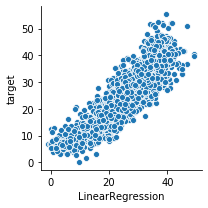

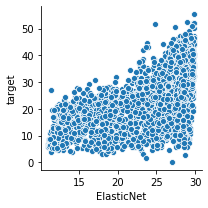

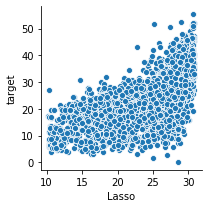

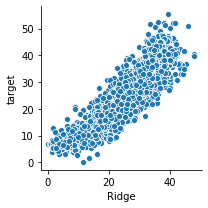

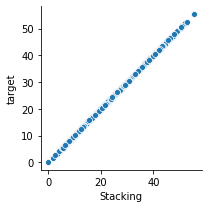

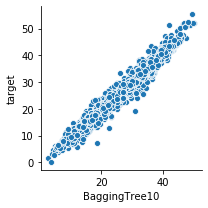

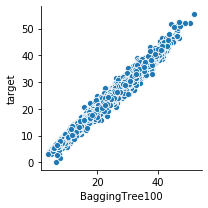

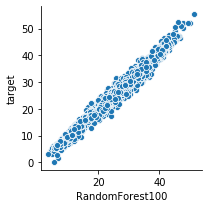

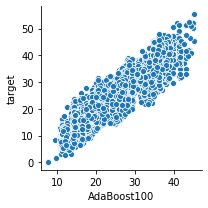

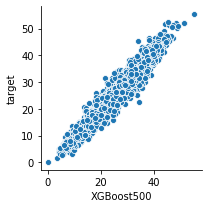

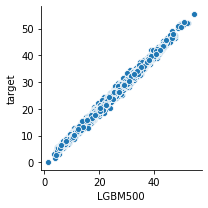

In [307]:
# visualizing models

for model_name in model_names: 
    sns.relplot(x=model_name, y="target", data=predictions_df, kind="scatter", height=(3))


Compare Bagging (100 estimators) with LGBM

In [321]:
MAE_bagging = metrics.mean_absolute_error(y_data, predict_bagging10)
print(f'MAE_bagging = {MAE_bagging}')
MSE_bagging = metrics.mean_squared_error(y_data, predict_bagging10)
print(f'MSE_bagging = {MSE_bagging}')

print('\n')

MAE_LGBM = metrics.mean_absolute_error(y_data, predict_lgbm)
print(f'MAE_LGBM = {MAE_LGBM}')
MSE_LGBM = metrics.mean_squared_error(y_data, predict_lgbm)
print(f'MSE_LGBM = {MSE_LGBM}')

MAE_bagging = 1.2219493209814891
MSE_bagging = 2.938224281413305


MAE_LGBM = 0.551016192410067
MSE_LGBM = 0.5451455276464255
